# Import Library

In [1]:
# 기본 패키지
import numpy as np
import pandas as pd

# 군집화 패키지
from sklearn.cluster import KMeans

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 시각화 패키지
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글폰트 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

# 데이터 경로 설정
data_path = '../data/LPOINT_BIG_COMP/LPOINT_BIG_COMP_'

# Data Load

In [2]:
# 데이터 불러오기
demo = pd.read_csv(data_path + '01_DEMO.csv', low_memory=False)
pdde = pd.read_csv(data_path + '02_PDDE.csv', low_memory=False)
cop = pd.read_csv(data_path + '03_COP_U.csv', low_memory=False)
clac = pd.read_csv(data_path + '04_PD_CLAC.csv', low_memory=False)
br = pd.read_csv(data_path + '05_BR.csv', low_memory=False)
lpay = pd.read_csv(data_path + '06_LPAY.csv', low_memory=False)

# Data PreProcessing

In [3]:
# Column명 변경
demo.columns = ['고객번호', '성별', '연령대', '거주지대분류코드']
pdde.columns = ['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량']
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '이용시간', '이용금액']
clac.columns = ['상품코드', '소분류명', '대분류명', '중분류명']
br.columns = ['점포코드', '제휴사', '점포대분류코드', '점포중분류코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액']

### [1. demo]: Demo

In [4]:
demo

,고객번호,성별,연령대,거주지대분류코드
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


In [5]:
# 데이터 타입 확인
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29913 entries, 0 to 29912
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   고객번호      29913 non-null  object
 1   성별        29913 non-null  object
 2   연령대       29913 non-null  object
 3   거주지대분류코드  29913 non-null  object
dtypes: object(4)
memory usage: 934.9+ KB


In [6]:
# 결측치 확인
demo.isna().sum()

고객번호        0
성별          0
연령대         0
거주지대분류코드    0
dtype: int64

In [7]:
# 데이터 갯수 확인
demo.nunique()

고객번호        29913
성별              2
연령대             6
거주지대분류코드       17
dtype: int64

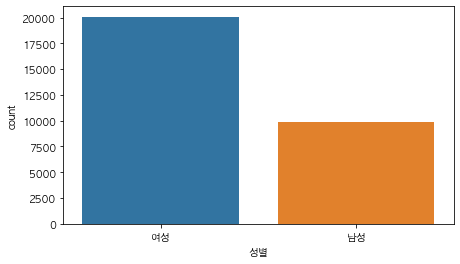

In [8]:
# 성별
plt.figure(figsize = (7, 4))
sns.countplot(x='성별', data=demo)
plt.show()

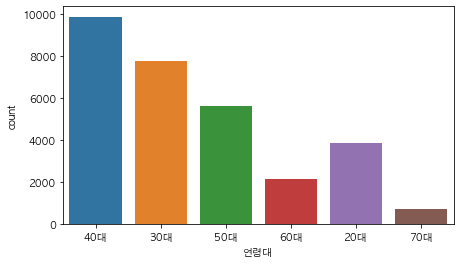

In [9]:
# 연령대
plt.figure(figsize = (7, 4))
sns.countplot(x='연령대', data=demo)
plt.show()

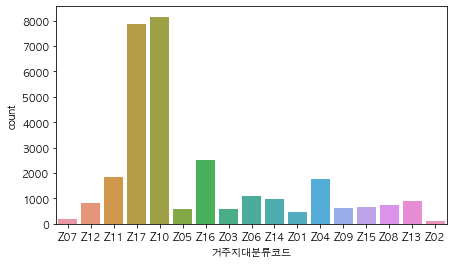

In [10]:
# 거주지대분류코드
plt.figure(figsize = (7, 4))
sns.countplot(x='거주지대분류코드', data=demo)
plt.show()

### [2. pdde]: 상품 구매 정보

In [11]:
pdde

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [12]:
# 중복되는 행 제거
pdde.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [13]:
pdde

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
5,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900.0,1
...,...,...,...,...,...,...,...,...,...,...
4381723,M816318679,E06052115831,2,A06,NaN,PD0507,20211231,22,50000.0,1
4381724,M816318679,E06052116037,2,A06,NaN,PD0507,20211231,22,10000.0,1
4381727,M182645944,E06052117103,2,A06,NaN,PD0294,20211231,23,289000.0,1
4381728,M533286446,E06052118403,2,A06,NaN,PD0507,20211231,23,200000.0,1


In [14]:
# 데이터 타입 확인
pdde.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4144389 entries, 0 to 4381733
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   고객번호    object 
 1   영수증번호   object 
 2   채널구분    int64  
 3   제휴사     object 
 4   점포코드    object 
 5   상품코드    object 
 6   구매일자    int64  
 7   구매시간    int64  
 8   구매금액    float64
 9   구매수량    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 347.8+ MB


In [15]:
# 결측치 확인
pdde.isna().sum()

고객번호          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     375784
상품코드          0
구매일자          0
구매시간          0
구매금액          0
구매수량          0
dtype: int64

In [16]:
# 상품 구매 정보 테이블 내에 점포 코드 결측치는 온라인으로 주문한 것을 확인할 수 있음. 온라인으로 주문한 뒤에 택배로 수령
pdde[pdde['점포코드'].isna()]['채널구분'].unique()

array([2])

In [17]:
# 결측치 치환
pdde['점포코드'] = pdde['점포코드'].fillna('온라인')

In [18]:
# 데이터 갯수 확인
pdde.nunique()

고객번호       26917
영수증번호    1266589
채널구분           2
제휴사            6
점포코드        6756
상품코드        1933
구매일자         365
구매시간          24
구매금액       33791
구매수량          85
dtype: int64

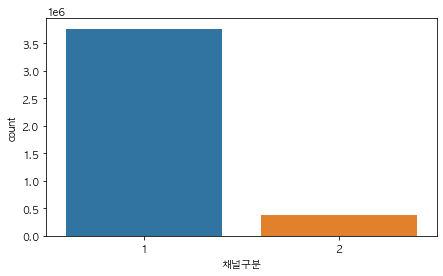

In [19]:
# 채널구분
plt.figure(figsize = (7, 4))
sns.countplot(x='채널구분', data=pdde)
plt.show()

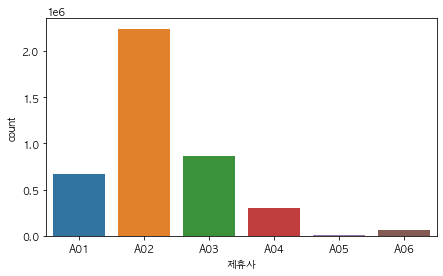

In [20]:
# 제휴사
plt.figure(figsize = (7, 4))
sns.countplot(x='제휴사', data=pdde)
plt.show()

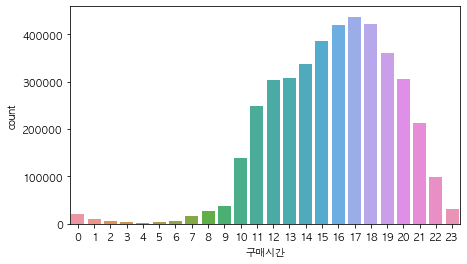

In [21]:
# 구매시간
plt.figure(figsize = (7, 4))
sns.countplot(x='구매시간', data=pdde)
plt.show()

### [3. cop]: 제휴사 이용 정보

In [22]:
cop

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


In [23]:
# 데이터 타입 확인
cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객번호    248304 non-null  object
 1   영수증번호   248304 non-null  object
 2   제휴사     248304 non-null  object
 3   점포코드    248249 non-null  object
 4   채널구분    248304 non-null  int64 
 5   이용일자    248304 non-null  int64 
 6   방문일자    248304 non-null  int64 
 7   이용시간    248304 non-null  int64 
 8   이용금액    248304 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.0+ MB


In [24]:
# 결측치 확인
cop.isna().sum()

고객번호      0
영수증번호     0
제휴사       0
점포코드     55
채널구분      0
이용일자      0
방문일자      0
이용시간      0
이용금액      0
dtype: int64

In [25]:
# 제휴사 이용 정보 테이블 내에 점포 코드 결측치는 온라인으로 주문한 것을 확인할 수 있음. 온라인으로 주문한 뒤에 택배로 수령
cop[cop['점포코드'].isna()]['채널구분'].unique()

array([2])

In [26]:
# 결측치 치환
cop['점포코드'] = cop['점포코드'].fillna('온라인')

In [27]:
# 데이터 갯수 확인
cop.nunique()

고객번호      21769
영수증번호    248304
제휴사           6
점포코드       2030
채널구분          2
이용일자        369
방문일자        366
이용시간         24
이용금액       9420
dtype: int64

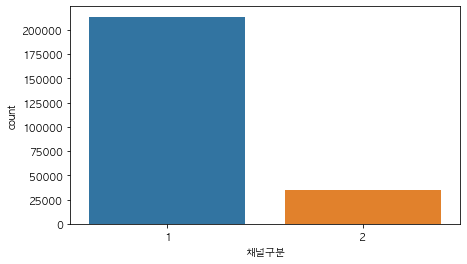

In [28]:
# 채널구분
plt.figure(figsize = (7, 4))
sns.countplot(x='채널구분', data=cop)
plt.show()

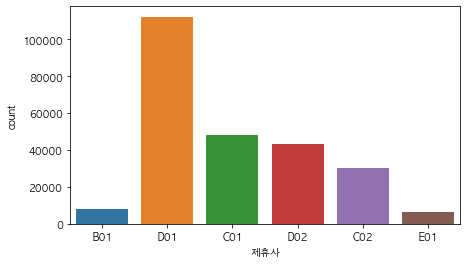

In [29]:
# 제휴사
plt.figure(figsize = (7, 4))
sns.countplot(x='제휴사', data=cop)
plt.show()

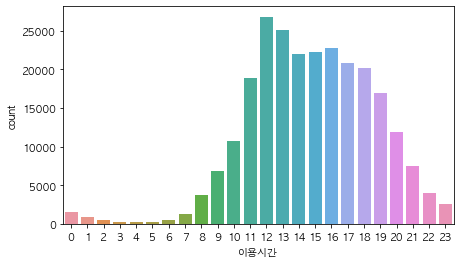

In [30]:
# 이용시간
plt.figure(figsize = (7, 4))
sns.countplot(x='이용시간', data=cop)
plt.show()

### [4. clac]: 상품 분류 정보

In [31]:
clac

,상품코드,소분류명,대분류명,중분류명
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [32]:
# 데이터 타입 확인
clac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품코드    1933 non-null   object
 1   소분류명    1933 non-null   object
 2   대분류명    1933 non-null   object
 3   중분류명    1933 non-null   object
dtypes: object(4)
memory usage: 60.5+ KB


In [33]:
# 결측치 확인
clac.isna().sum()

상품코드    0
소분류명    0
대분류명    0
중분류명    0
dtype: int64

In [34]:
# 데이터 갯수 확인
clac.nunique()

상품코드    1933
소분류명    1932
대분류명      60
중분류명     349
dtype: int64

### [5. br]: 점포 정보

In [35]:
br

,점포코드,제휴사,점포대분류코드,점포중분류코드
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


In [36]:
# 데이터 타입 확인
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   점포코드     8808 non-null   object
 1   제휴사      8808 non-null   object
 2   점포대분류코드  8808 non-null   object
 3   점포중분류코드  8808 non-null   object
dtypes: object(4)
memory usage: 275.4+ KB


In [37]:
# 결측치 확인
br.isna().sum()

점포코드       0
제휴사        0
점포대분류코드    0
점포중분류코드    0
dtype: int64

In [38]:
# 데이터 갯수 확인
br.nunique()

점포코드       8808
제휴사          11
점포대분류코드      17
점포중분류코드     257
dtype: int64

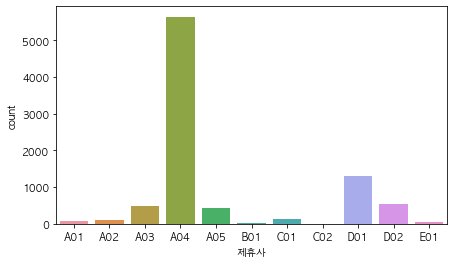

In [39]:
# 제휴사
plt.figure(figsize = (7, 4))
sns.countplot(x='제휴사', data=br)
plt.show()

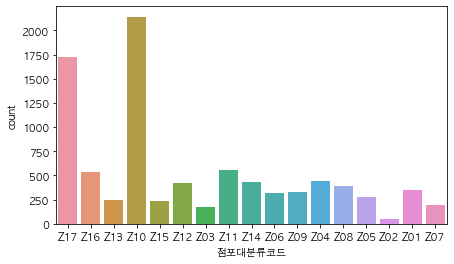

In [40]:
# 점포대분류코드
plt.figure(figsize = (7, 4))
sns.countplot(x='점포대분류코드', data=br)
plt.show()

### [6. lpay]: 엘페이 이용

In [41]:
lpay

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


In [42]:
# 데이터 타입 확인
lpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객번호    353184 non-null  object
 1   영수증번호   353184 non-null  int64 
 2   제휴사     353184 non-null  object
 3   채널구분    353184 non-null  int64 
 4   이용일자    353184 non-null  int64 
 5   이용시간    353184 non-null  int64 
 6   이용금액    353184 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.9+ MB


In [43]:
# 결측치 확인
lpay.isna().sum()

고객번호     0
영수증번호    0
제휴사      0
채널구분     0
이용일자     0
이용시간     0
이용금액     0
dtype: int64

In [44]:
# 데이터 갯수 확인
lpay.nunique()

고객번호       8906
영수증번호    353184
제휴사          14
채널구분          2
이용일자        365
이용시간         24
이용금액      37755
dtype: int64

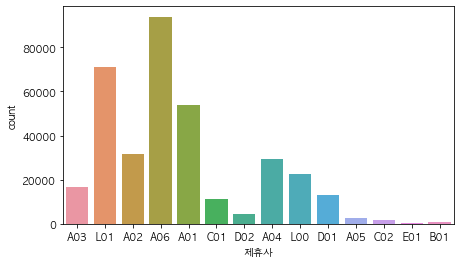

In [45]:
# 제휴사
plt.figure(figsize = (7, 4))
sns.countplot(x='제휴사', data=lpay)
plt.show()

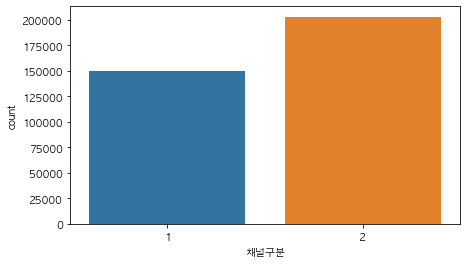

In [46]:
# 채널구분
plt.figure(figsize = (7, 4))
sns.countplot(x='채널구분', data=lpay)
plt.show()

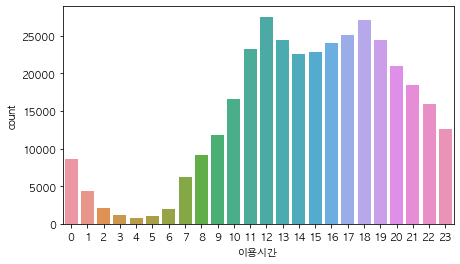

In [47]:
# 이용시간
plt.figure(figsize = (7, 4))
sns.countplot(x='이용시간', data=lpay)
plt.show()

# Data Merge

In [48]:
# 데이터 크기 확인
print('pdde :',pdde.shape)
print('copu :',cop.shape)
print('lpay :',lpay.shape)

pdde : (4144389, 10)
copu : (248304, 9)
lpay : (353184, 7)


In [49]:
# # 칼럼별 상관관계 확인
# # 제휴사 테이블 중에서 방문일자와 이용일자는 상관관계가 상당히 높게 나타남을 확인
# # 제휴사 테이블 내 방문일자 제거
# plt.figure(figsize=(15,15))
# sns.heatmap(data = cop.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

In [50]:
# 데이터를 통합하기 위하여 칼럼 통합
pdde['타입'] = 'Product'
cop['타입'] = 'Affiliate'
lpay['타입'] = 'Lpay'
pdde['방문일자'] = 0
lpay['방문일자'] = 0
cop['구매수량'] = 0
cop['상품코드'] = np.nan
lpay['점포코드'] = np.nan
lpay['상품코드'] = np.nan
lpay['구매수량'] = 0

In [51]:
# 칼럼명을 새롭게 동일하게 통일
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '구매일자', '방문일자', '구매시간', '구매금액', '타입', '구매수량', '상품코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '구매일자', '구매시간', '구매금액', '타입', '방문일자', '점포코드', '상품코드', '구매수량']

In [52]:
# 상품구매데이터를 기준으로 하여 열을 통일
cop = cop[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]
lpay = lpay[['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '방문일자', '구매시간', '구매금액', '구매수량', '타입']]

In [53]:
# 데이터 타입 변경
lpay['영수증번호'] = lpay['영수증번호'].astype('object')
lpay['점포코드'] = lpay['점포코드'].astype('object')
cop['상품코드'] = cop['상품코드'].astype('object')
lpay['상품코드'] = lpay['상품코드'].astype('object')
pdde['구매금액'] = pdde['구매금액'].astype('int')
pdde['방문일자'] = pdde['방문일자'].astype('int64')
lpay['방문일자'] = lpay['방문일자'].astype('int64')

In [54]:
# 데이터 concat
df = pd.concat([pdde,cop,lpay])

In [55]:
# 고객 정보 테이븛 통합
df = pd.merge(df, demo, on = ['고객번호'], how = 'left')

In [56]:
# 상품 분류 테이블 통합
df = pd.merge(df, br, on = ['점포코드','제휴사'], how = 'left')

In [57]:
# 점포 정보 테이블 통합
df = pd.merge(df, clac, on = ['상품코드'], how = 'left')

In [58]:
# 결측치 확인
df.isna().sum()

고객번호             0
영수증번호            0
채널구분             0
제휴사              0
점포코드        353184
상품코드        601488
구매일자             0
구매시간             0
구매금액             0
구매수량             0
타입               0
방문일자             0
성별               0
연령대              0
거주지대분류코드         0
점포대분류코드     729023
점포중분류코드     729023
소분류명        601488
대분류명        601488
중분류명        601488
dtype: int64

In [59]:
print('<엘페이>')
print(lpay.isna().sum())
print('<제휴사>')
print(cop.isna().sum())
print('<상품구매>')
print(pdde.isna().sum())

<엘페이>
고객번호          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     353184
상품코드     353184
구매일자          0
방문일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
<제휴사>
고객번호          0
영수증번호         0
채널구분          0
제휴사           0
점포코드          0
상품코드     248304
구매일자          0
방문일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
<상품구매>
고객번호     0
영수증번호    0
채널구분     0
제휴사      0
점포코드     0
상품코드     0
구매일자     0
구매시간     0
구매금액     0
구매수량     0
타입       0
방문일자     0
dtype: int64


In [60]:
df.head()

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,방문일자,성별,연령대,거주지대분류코드,점포대분류코드,점포중분류코드,소분류명,대분류명,중분류명
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1,Product,0,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1,Product,0,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,0,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1,Product,0,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900,1,Product,0,여성,50대,Z17,Z10,Z10042,커피/음료,테넌트/음식점,식당


In [61]:
data = df.copy()

In [62]:
# 데이터 분리
df1 = data[data['타입']== 'Product']
df2 = data[data['타입']== 'Affiliate']
df3 = data[data['타입']== 'Lpay']

In [63]:
customer_id = df.groupby('고객번호')[['구매일자']].max().index.tolist()
recency = df.groupby('고객번호')[['구매일자']].max()['구매일자'].tolist()
frequency = df.groupby('고객번호')[['영수증번호']].count()['영수증번호'].tolist()
monetary = df.groupby('고객번호')[['구매금액']].sum()['구매금액'].tolist()

df_rfm = pd.DataFrame({'Customer_ID': customer_id, 'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

In [64]:
df_rfm['Recency'] = df_rfm['Recency'].astype(str)
df_rfm['Recency'] = pd.to_datetime(df_rfm['Recency'])
df_rfm['Recency'] = df_rfm['Recency'] - pd.to_datetime('20210101')
df_rfm['Recency'] = [x.total_seconds() for x in df_rfm['Recency']]
df_rfm

,Customer_ID,Recency,Frequency,Monetary
0,M000034966,30758400.0,49,616240
1,M000059535,5270400.0,1,46000
2,M000136117,31363200.0,121,28697031
3,M000201112,28598400.0,20,51420
4,M000225114,31449600.0,163,2084270
...,...,...,...,...
29869,M999708287,21081600.0,2,60000
29870,M999770689,31449600.0,402,2078770
29871,M999849895,28857600.0,70,1095312
29872,M999926092,28944000.0,7,129500


# Data Clustering

In [65]:
from sklearn.cluster import KMeans

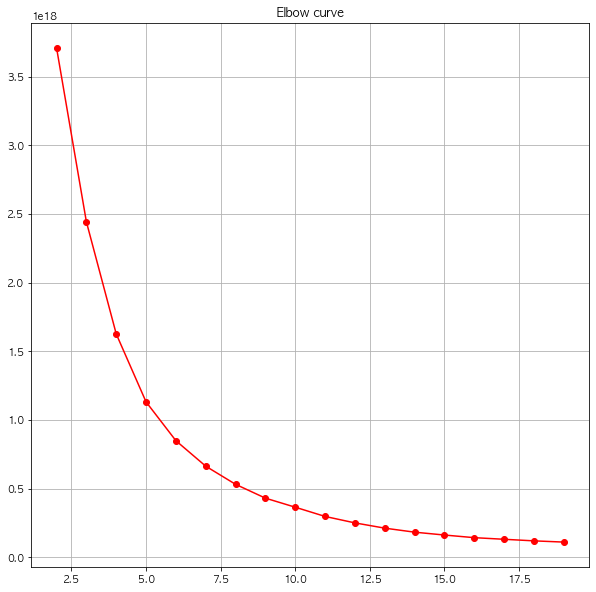

In [73]:
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_rfm.iloc[:,1:])
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 10))
plt.plot(range(2, 20), distortions, marker = 'o', color = 'r')
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [74]:
from sklearn.metrics import silhouette_samples, silhouette_score

si = []

def silhouette(X):
    for i in range(2,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        si.append(np.round(silhouette_score(X, km.labels_), 3))
    
silhouette(df_rfm.iloc[:,1:])

[0.942 0.823 0.67  0.684 0.685 0.608 0.588 0.586 0.54 ]


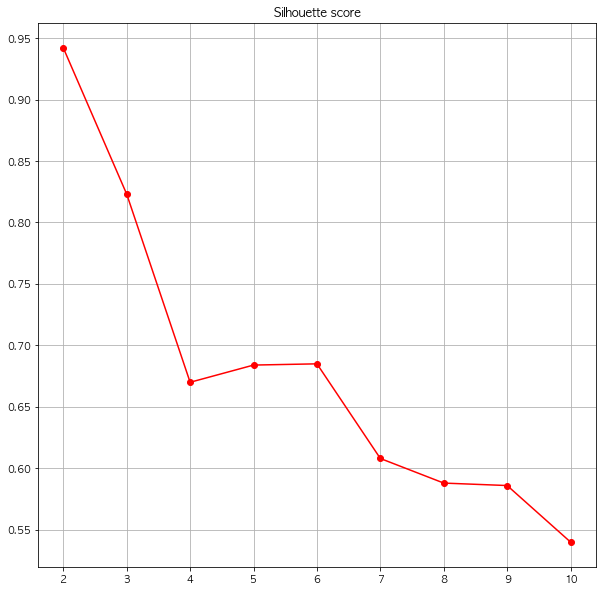

In [79]:
fig = plt.figure(figsize=(10, 10))
plt.plot(range(2, 11), si, marker = 'o', color = 'r')
plt.grid(True)
plt.title('Silhouette score')
plt.show()

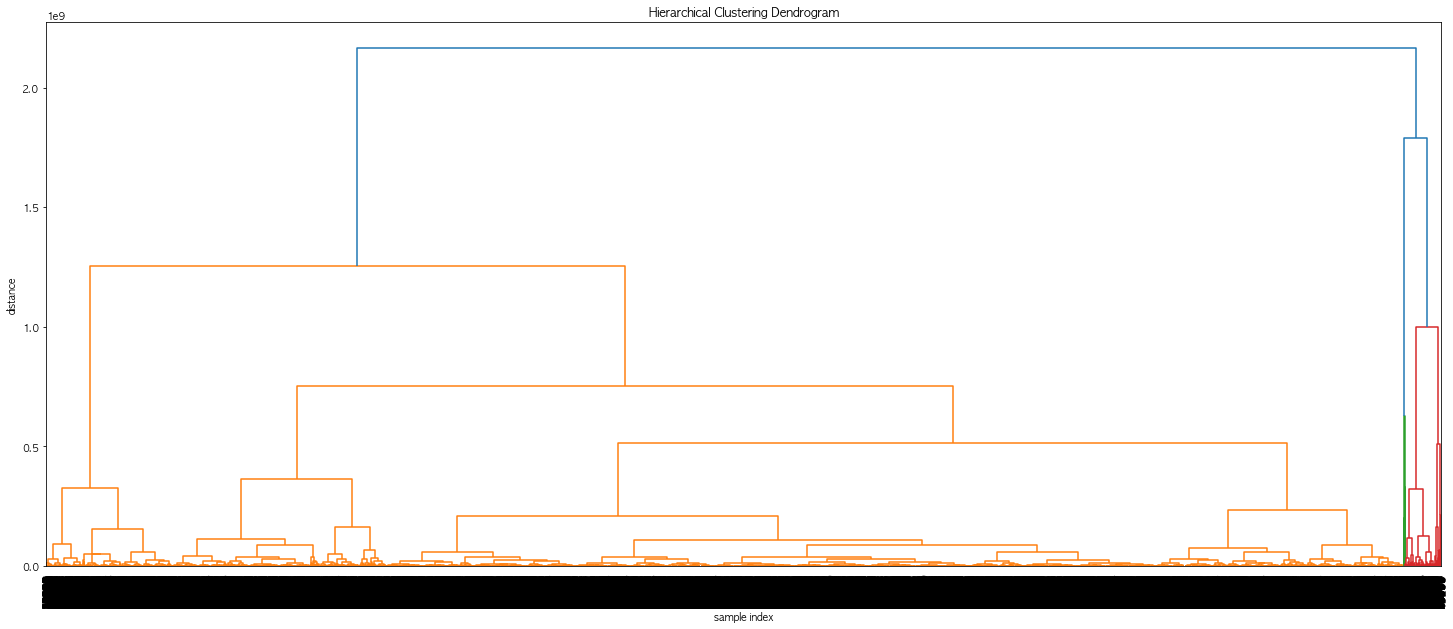

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df_rfm.iloc[:,1:], 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10,  # font size for the x axis labels  
)
plt.show()